# 获取前n个主成分

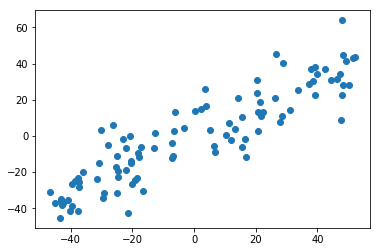

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:,0] = np.random.uniform(0, 100, size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10, size=100)

def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# 目标函数，求方差。
def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)


# 利用数学推导出的公式求解w
def df(w, X):
    return (X.T.dot(X.dot(w))) * 2 / len(X)

# 单位化向量w
def direction(w):
    return w / np.linalg.norm(w)


# 梯度上升
def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w) # 将w向量单位化
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X) # 求梯度
        last_w = w
        w = w + gradient * eta
        w = direction(w)
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break;
        cur_iter += 1
    return w

In [4]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77261905, 0.63486991])

In [5]:
X2 = np.empty(X.shape)

In [6]:
X2.shape

(100, 2)

In [11]:
# 将向量X去掉在w方向上的成分
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

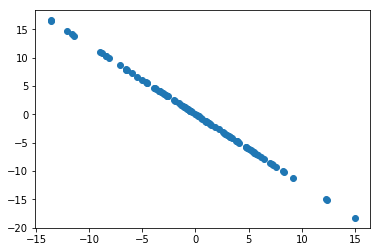

In [12]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [15]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63486828,  0.77262039])

In [16]:
w.dot(w2)

2.10922416582493e-06